In [45]:
# @title 1. Extraccion de Archivo Tratado

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/TelecomX_Dato_Limpio.csv')
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  Cuentas_Diarias  
0                    65.6                593.30         2.186667  
1                    59.9                542.40         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                267.40         2.796667  

[5 rows x 22 columns]

In [46]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [48]:
# @title 2. Eliminacion de Colummnas Irrelevantes

df = df.drop('customerID', axis=1)
df.head()

Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity  ...  \
0                      DSL                      No  ...   
1                      DSL                      No  ...   
2              Fiber optic                      No  ...   
3              Fiber optic                      No  ...   
4              Fiber optic                      No  ...   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  \
0          Mailed check                    65.6                 593.30   
1          Mailed check                    59.9                 542.40   
2      Electronic check                    73.9                 280.85   
3      Electronic check                    98.0                1237.85   
4          Mailed check                    83.9                 267.40   

   Cuentas_Diarias  
0         2.186667  
1         1.996667  
2         2.463333  
3         3.266667  
4         2.796667  

[5 rows x 21 columns]

In [66]:
# @title 3. Encoding

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

Churn  customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0    No                       0                9                     65.6   
1    No                       0                9                     59.9   
2   Yes                       0                4                     73.9   
3   Yes                       1               13                     98.0   
4   Yes                       1                3                     83.9   

   account.Charges.Total  Cuentas_Diarias  customer.gender_Male  \
0                 593.30         2.186667                 False   
1                 542.40         1.996667                  True   
2                 280.85         2.463333                  True   
3                1237.85         3.266667                  True   
4                 267.40         2.796667                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  ...  \
0                  True                     True                    True  ...   
1                 False                    False                    True  ...   
2                 False                    False                    True  ...   
3                  True                    False                    True  ...   
4                  True                    False                    True  ...   

   internet.StreamingTV_No internet service  internet.StreamingTV_Yes  \
0                                     False                      True   
1                                     False                     False   
2                                     False                     False   
3                                     False                      True   
4                                     False                      True   

   internet.StreamingMovies_No internet service  internet.StreamingMovies_Yes  \
0                                         False                         False   
1                                         False                          True   
2                                         False                         False   
3                                         False                          True   
4                                         False                         False   

   account.Contract_One year  account.Contract_Two year  \
0                       True                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   account.PaperlessBilling_Yes  \
0                          True   
1                         False   
2                          True   
3                          True   
4                          True   

   account.PaymentMethod_Credit card (automatic)  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 32 columns]

In [50]:
# @title 4. Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

# Calcular la proporci√≥n de clientes con Churn
churn_counts = df['Churn'].value_counts()
churn_proportion = churn_counts / len(df)

# Mostrar la proporci√≥n de churn en una tabla
print("Proporci√≥n de Churn:")
display(churn_proportion)

Proporci√≥n de Churn:


Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [51]:
# @title 5. Balanceo de Datos

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Asegurarse de que df_encoded est√° disponible (viene de la celda de encoding)
# Si no est√° disponible, ejecutar las celdas anteriores
if 'df_encoded' not in globals():
    print("Error: 'df_encoded' no encontrado. Por favor, ejecuta las celdas anteriores.")
else:
    # Rellenar valores faltantes en 'account.Charges.Total' con la mediana
    # Esto es necesario ya que SMOTE no puede manejar valores NaN
    df_encoded['account.Charges.Total'] = df_encoded['account.Charges.Total'].fillna(df_encoded['account.Charges.Total'].median())

    # Verificar si quedan valores faltantes (deber√≠a ser 0)
    print("Valores faltantes despu√©s de imputaci√≥n:", df_encoded.isnull().sum().sum())


    # Separar las caracter√≠sticas (X) y la variable objetivo (y)
    # Convertir la variable objetivo 'Churn' a num√©rico (0 para 'No', 1 para 'Yes')
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


    # Dividir los datos en conjuntos de entrenamiento y prueba
    # Usamos stratify=y para mantener la proporci√≥n de clases en ambos conjuntos antes de aplicar SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Aplicar SMOTE solo al conjunto de entrenamiento
    # SMOTE genera ejemplos sint√©ticos de la clase minoritaria para balancear el conjunto de entrenamiento
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Mostrar las nuevas proporciones de clases en el conjunto de entrenamiento balanceado
    print("\nProporci√≥n de clases despu√©s de SMOTE:")
    print(y_train_res.value_counts() / len(y_train_res))

    # Mostrar los tama√±os de los conjuntos resultantes despu√©s de SMOTE
    print("\nTama√±o del conjunto de entrenamiento despu√©s de SMOTE (X_train_res, y_train_res):", X_train_res.shape, y_train_res.shape)
    print("Tama√±o del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Valores faltantes despu√©s de imputaci√≥n: 0

Proporci√≥n de clases despu√©s de SMOTE:
Churn
0    0.5
1    0.5
Name: count, dtype: float64

Tama√±o del conjunto de entrenamiento despu√©s de SMOTE (X_train_res, y_train_res): (8278, 31) (8278,)
Tama√±o del conjunto de prueba (X_test, y_test): (1409, 31) (1409,)


In [52]:
# @title 6. Normalizacion y Estandarizacion de Datos

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Estandarizar las caracter√≠sticas en los conjuntos de entrenamiento y prueba
# Ajustamos el scaler solo con los datos de entrenamiento balanceados
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Tama√±o del conjunto de entrenamiento estandarizado:", X_train_scaled.shape)
print("Tama√±o del conjunto de prueba estandarizado:", X_test_scaled.shape)

Tama√±o del conjunto de entrenamiento estandarizado: (8278, 31)
Tama√±o del conjunto de prueba estandarizado: (1409, 31)


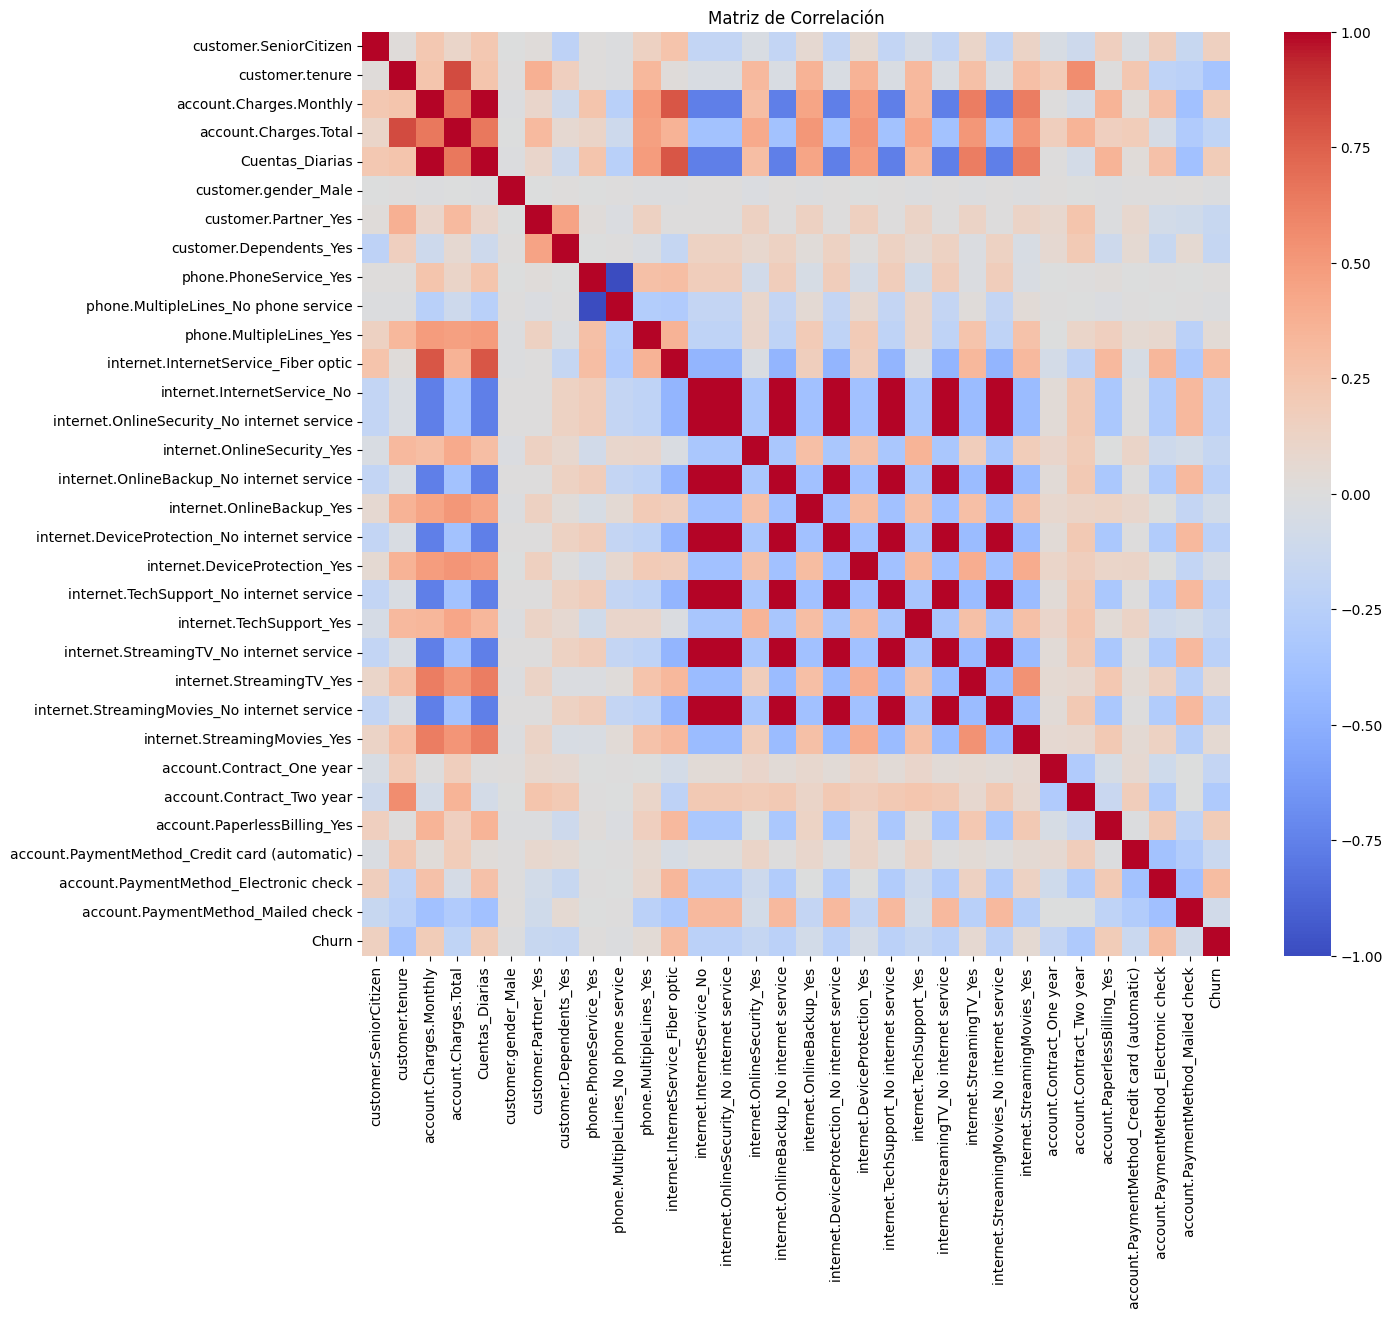


Correlaci√≥n con la variable Churn:


Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Cuentas_Diarias                                  0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                            -0.150448
customer.Dependents_Yes                         -0.164221
internet.TechSupport_Yes                        -0.164674
internet.OnlineSecurity_Yes                     -0.171226
account.Contract_One year                       -0.177820
account.Charges.Total                           -0.199037
internet.OnlineSecurity_No internet service     -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
internet.InternetService_No                     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
account.Contract_Two year                       -0.302253
customer.tenure                                 -0.352229
Name: Churn, dtype: float64

In [53]:
# @title 7. Analisis de Correlacion

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinar las caracter√≠sticas (X) y la variable objetivo (y) para el an√°lisis de correlaci√≥n
# Asegurarse de que X y y est√°n disponibles (vienen de la celda de balanceo)
if 'X' not in globals() or 'y' not in globals():
    print("Error: 'X' o 'y' no encontrados. Por favor, ejecuta las celdas anteriores.")
else:
    df_corr = pd.concat([X, y], axis=1)

    # Calcular la matriz de correlaci√≥n
    correlation_matrix = df_corr.corr()

    # Visualizar la matriz de correlaci√≥n usando un mapa de calor
    plt.figure(figsize=(14, 12)) # Ajustar tama√±o para mejor visualizaci√≥n
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlaci√≥n')
    plt.show()

    # Opcional: Mostrar las correlaciones con la variable objetivo 'Churn' en formato de tabla
    print("\nCorrelaci√≥n con la variable Churn:")
    display(correlation_matrix['Churn'].sort_values(ascending=False))

In [54]:
# @title 8. Analisis Dirigido

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que df est√° disponible (viene de la celda de carga de datos)
if 'df' not in globals():
    print("Error: 'df' no encontrado. Por favor, ejecuta la celda de carga de datos.")
else:
    # Analizar la relaci√≥n entre el tipo de contrato y Churn
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='account.Contract', hue='Churn', palette='viridis')
    plt.title('Relaci√≥n entre Tipo de Contrato y Churn')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('N√∫mero de Clientes')
    plt.show()

    # Analizar la relaci√≥n entre el gasto total y Churn usando un boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='viridis', hue='Churn')
    plt.title('Relaci√≥n entre Gasto Total y Churn')
    plt.xlabel('Churn')
    plt.ylabel('Gasto Total')
    plt.show()

In [55]:
# @title 9. Separacion de Datos

from sklearn.model_selection import train_test_split
import pandas as pd

# Asegurarse de que df_encoded est√° disponible (viene de la celda de encoding y manejo de faltantes)
if 'df_encoded' not in globals():
    print("Error: 'df_encoded' no encontrado. Por favor, ejecuta las celdas anteriores.")
else:
    # Separar las caracter√≠sticas (X) y la variable objetivo (y)
    # Convertir la variable objetivo 'Churn' a num√©rico (0 para 'No', 1 para 'Yes')
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    # Usamos stratify=y para mantener la proporci√≥n de clases en ambos conjuntos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Tama√±o del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
    print("Tama√±o del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tama√±o del conjunto de entrenamiento (X_train, y_train): (5634, 31) (5634,)
Tama√±o del conjunto de prueba (X_test, y_test): (1409, 31) (1409,)


In [72]:
# @title 10. Modelo de Regresion Logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar usando datos normalizados
log_reg.fit(X_train_scaled, y_train_res) # Corregido: usar y_train_res

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluaci√≥n
print("üìä Regresi√≥n Log√≠stica (normalizada)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred_log))

üìä Regresi√≥n Log√≠stica (normalizada)
Accuracy: 0.7743080198722498
Matriz de confusi√≥n:
 [[860 175]
 [143 231]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [73]:
# @title Grafico de Regresion Logistica
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asegurarse de que y_test y y_pred_log est√°n disponibles (vienen de la celda de evaluaci√≥n de Regresi√≥n Log√≠stica)
if 'y_test' not in globals() or 'y_pred_log' not in globals():
    print("Error: Las variables y_test o y_pred_log no encontradas. Por favor, ejecuta la celda donde se eval√∫a el modelo de Regresi√≥n Log√≠stica (celda lhGx_nAs_vH0).")
else:
    # Calcular la matriz de confusi√≥n
    cm_log = confusion_matrix(y_test, y_pred_log)

    # Crear un mapa de calor para visualizar la matriz de confusi√≥n
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Matriz de Confusi√≥n del Modelo de Regresi√≥n Log√≠stica')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Valor Real')
    plt.show()

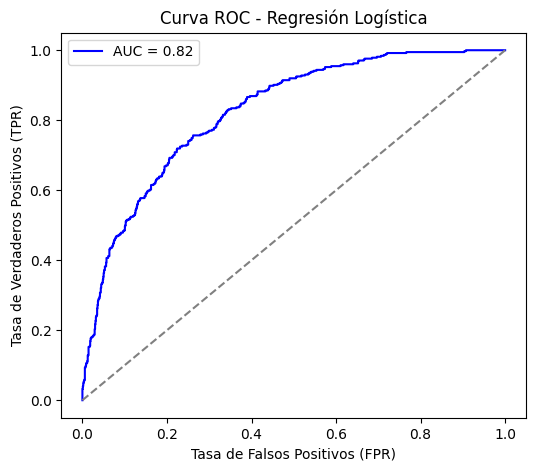

In [81]:
# @title Grafico de Regresion Logistica (Curva ROC y AUC)
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresi√≥n Log√≠stica')
plt.legend()
plt.show()


/tmp/ipython-input-4149652878.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10), palette='coolwarm')


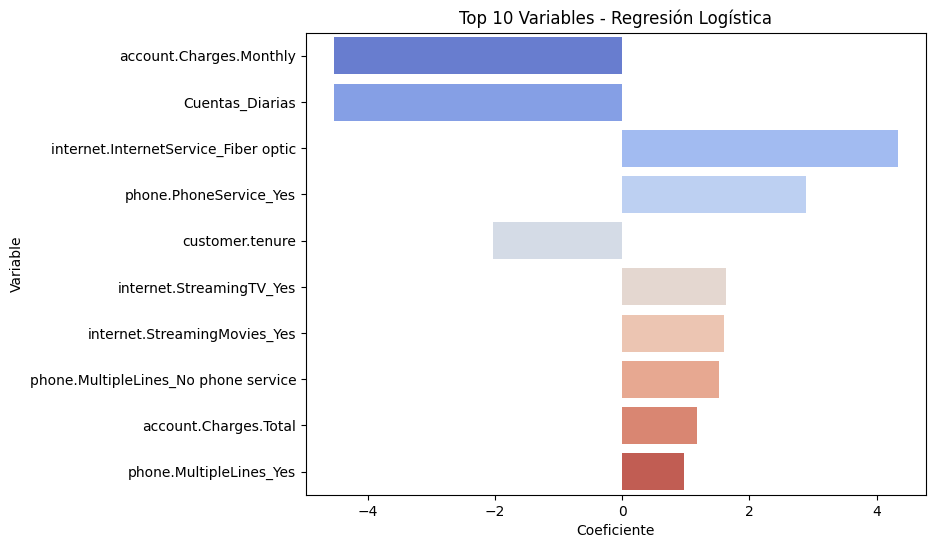

In [82]:
# @title Gr√°fico de Importancia de Variables (Coeficientes)
import pandas as pd
import numpy as np

# Obtener nombres de variables
feature_names = X.columns

# Extraer coeficientes
coefs = log_reg.coef_[0]

# Crear DataFrame ordenado por importancia absoluta
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefs})
coef_df['Importancia'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10), palette='coolwarm')
plt.title('Top 10 Variables - Regresi√≥n Log√≠stica')
plt.show()


In [75]:
# @title 11. Modelo KNM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo con k=5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar usando datos normalizados
knn.fit(X_train_scaled, y_train_res)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Evaluaci√≥n
print("üìä KNN (normalizado)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred_knn))

üìä KNN (normalizado)
Accuracy: 0.7338537970191625
Matriz de confusi√≥n:
 [[793 242]
 [133 241]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.76      0.73      0.74      1409



In [77]:
# @title Grafico de Modelo KNM (Curva ROC y AUC)
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN')
plt.legend()
plt.show()


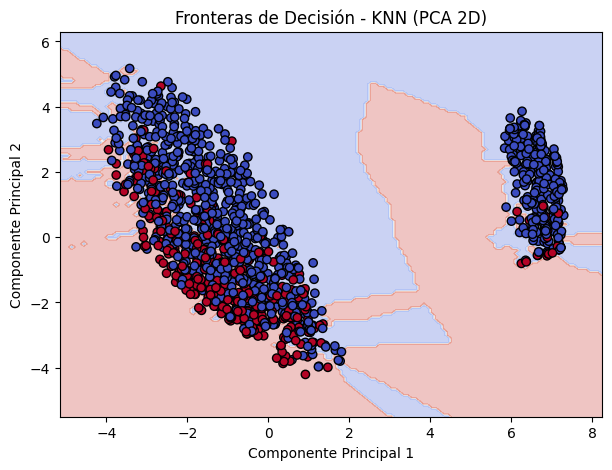

In [80]:
# @title Grafico de Modelo KNM (Visualizaci√≥n de Fronteras de Decisi√≥n)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reentrenar KNN con los datos reducidos
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train_res) # Corregido: usar y_train_res

# Crear malla de puntos para dibujar fronteras
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.title('Fronteras de Decisi√≥n - KNN (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [91]:
# @title 12. Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar usando datos balanceados
# Asegurarse de que X_train_res y y_train_res est√°n disponibles
if 'X_train_res' not in globals() or 'y_train_res' not in globals():
    print("Error: X_train_res o y_train_res no encontrados. Por favor, ejecuta la celda de Balanceo de Datos.")
else:
    rf.fit(X_train_res, y_train_res)

    # Predicciones en el conjunto de prueba original (no escalado ni balanceado)
    y_pred_rf = rf.predict(X_test)

    # Evaluaci√≥n
    print("üìä Random Forest (entrenado con datos balanceados)")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_rf))
    print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred_rf))

üìä Random Forest (entrenado con datos balanceados)
Accuracy: 0.7714691270404542
Matriz de confusi√≥n:
 [[873 162]
 [160 214]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [92]:
# @title Grafico Matriz de Confusion - Random Forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_rf)

# Graficar
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n - Random Forest')
plt.show()


In [93]:
# @title Grafico - Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

# Probabilidades para la clase positiva
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='green')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


In [94]:
# @title Grafico - Importancia de Variables
import pandas as pd
import numpy as np

# Obtener importancias
importances = rf.feature_importances_

# Crear DataFrame
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Graficar las 10 m√°s importantes
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Variables - Random Forest')
plt.show()


/tmp/ipython-input-3507168583.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')


/tmp/ipython-input-3520320042.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame([{


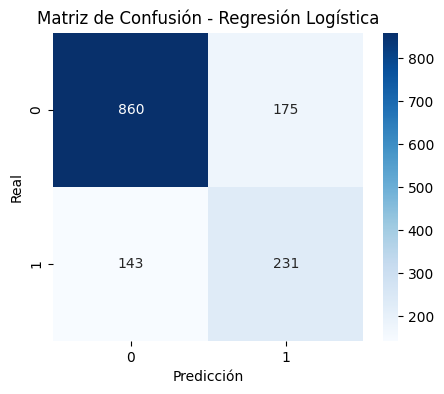


Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica:

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



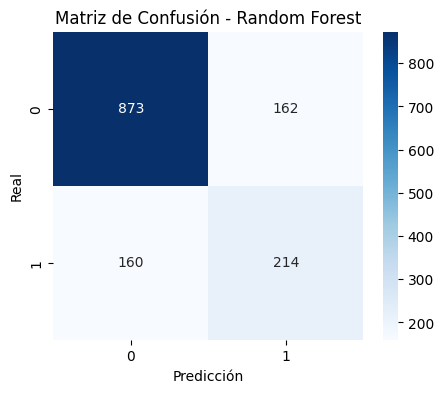


Reporte de Clasificaci√≥n - Random Forest:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



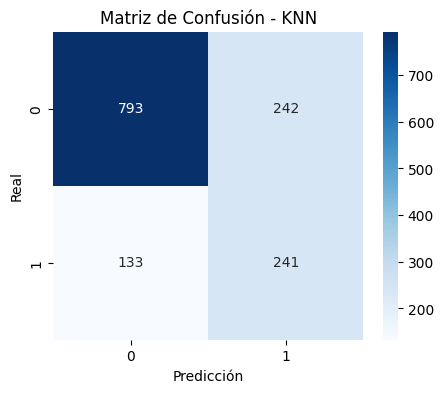


Reporte de Clasificaci√≥n - KNN:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.76      0.73      0.74      1409


üìä Comparaci√≥n de Modelos:

                Modelo  Exactitud  Precisi√≥n    Recall  F1-Score
0  Regresi√≥n Log√≠stica   0.774308   0.780859  0.774308  0.777166
1        Random Forest   0.771469   0.771861  0.771469  0.771663
2                  KNN   0.733854   0.761503  0.733854  0.743382

‚úÖ Mejor modelo seg√∫n Exactitud: Regresi√≥n Log√≠stica
‚úÖ Regresi√≥n Log√≠stica: Consistencia aceptable entre entrenamiento y prueba (Entrenamiento: 0.83, Test: 0.77)
‚ö† Random Forest podr√≠a tener diferencias significativas entre entrenamiento y prueba (Entrenamiento: 1.00, Test: 0.77)
‚úÖ KNN: Consistencia aceptable entre entrenamient

In [95]:
# @title 13. Evaluacion de Modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de modelos entrenados y sus nombres
modelos = [
    ("Regresi√≥n Log√≠stica", log_reg),  # Corregido: usar log_reg
    ("Random Forest", rf),         # Corregido: usar rf
    ("KNN", knn)                   # Corregido: usar knn
]

# DataFrame para guardar resultados
resultados = pd.DataFrame(columns=["Modelo", "Exactitud", "Precisi√≥n", "Recall", "F1-Score"])

# Evaluar cada modelo
for nombre, modelo in modelos:
    # Predicciones
    y_pred = modelo.predict(X_test_scaled if nombre in ["Regresi√≥n Log√≠stica", "KNN"] else X_test) # Usar datos escalados para RL y KNN

    # M√©tricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar en DataFrame
    resultados = pd.concat([resultados, pd.DataFrame([{
        "Modelo": nombre,
        "Exactitud": acc,
        "Precisi√≥n": prec,
        "Recall": rec,
        "F1-Score": f1
    }])], ignore_index=True)

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.show()

    # Reporte de clasificaci√≥n
    print(f"\nReporte de Clasificaci√≥n - {nombre}:\n")
    print(classification_report(y_test, y_pred))

# Mostrar tabla comparativa
print("\nüìä Comparaci√≥n de Modelos:\n")
print(resultados)

# ---- An√°lisis Cr√≠tico ----
mejor_modelo = resultados.loc[resultados["Exactitud"].idxmax(), "Modelo"]
print(f"\n‚úÖ Mejor modelo seg√∫n Exactitud: {mejor_modelo}")

# Detectar posible overfitting (comparando con entrenamiento si se quiere)
# Nota: Para una detecci√≥n m√°s robusta de overfitting, se deber√≠an evaluar las m√©tricas en el conjunto de entrenamiento tambi√©n.
# Aqu√≠ solo se muestra un ejemplo b√°sico comparando accuracy en train vs test,
# pero se necesitar√≠a un seguimiento m√°s detallado para modelos complejos y conjuntos de datos.
# Las variables X_train_scaled, y_train_res, X_test_scaled son para modelos que necesitan escalado (RL, KNN)
# Las variables X_train_res, y_train_res, X_test son para modelos que no necesitan escalado (RF, √Årbol de Decisi√≥n)

# Ejemplo b√°sico de comparaci√≥n de accuracy para detectar posible overfitting
for nombre, modelo in modelos:
    if nombre in ["Regresi√≥n Log√≠stica", "KNN"]:
        acc_train = accuracy_score(y_train_res, modelo.predict(X_train_scaled))
        acc_test = accuracy_score(y_test, modelo.predict(X_test_scaled))
    else: # Asumimos Random Forest y otros que no necesitan escalado
        acc_train = accuracy_score(y_train_res, modelo.predict(X_train_res))
        acc_test = accuracy_score(y_test, modelo.predict(X_test))

    # Un diferencia de accuracy entre train y test mayor a un umbral (ej. 0.10) podr√≠a sugerir overfitting
    if abs(acc_train - acc_test) > 0.15: # Aumentar el umbral para ser menos sensible a peque√±as diferencias
        print(f"‚ö† {nombre} podr√≠a tener diferencias significativas entre entrenamiento y prueba (Entrenamiento: {acc_train:.2f}, Test: {acc_test:.2f})")
    else:
        print(f"‚úÖ {nombre}: Consistencia aceptable entre entrenamiento y prueba (Entrenamiento: {acc_train:.2f}, Test: {acc_test:.2f})")

In [114]:
# @title 14. Analisis de Variable - Random Forest

# Asegurarse de que X y rf est√°n disponibles
if 'X' not in globals() or 'rf' not in globals():
     print("Error: Las variables X o rf no encontradas. Por favor, ejecuta las celdas anteriores.")
else:
    # Obtener nombres de caracter√≠sticas del DataFrame original X
    feature_names = X.columns

    # Obtener importancias de caracter√≠sticas del modelo Random Forest entrenado (rf)
    feature_importances = rf.feature_importances_

    # Crear DataFrame
    importancia_df = pd.DataFrame({
        'Caracteristica': feature_names,
        'Importancia': feature_importances
    })

    # Ordenar por importancia
    importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

    print("\nTop 15 Caracter√≠sticas m√°s importantes para predecir Churn (Random Forest):")
    display(importancia_df.head(15)) # Usar display para una mejor visualizaci√≥n

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='viridis')
    plt.title('Top 15 Caracter√≠sticas M√°s Importantes para Predecir Churn (Random Forest)', fontsize=16)
    plt.xlabel('Importancia', fontsize=12)
    plt.ylabel('Caracter√≠stica', fontsize=12)
    plt.tight_layout()
    plt.show()




Top 15 Caracter√≠sticas m√°s importantes para predecir Churn (Random Forest):


Caracteristica  Importancia
0                           account.Charges.Total     0.151734
1                                 customer.tenure     0.145936
2                                 Cuentas_Diarias     0.101389
3                         account.Charges.Monthly     0.098314
4          account.PaymentMethod_Electronic check     0.094753
5            internet.InternetService_Fiber optic     0.050203
6                    account.PaperlessBilling_Yes     0.044883
7                       account.Contract_Two year     0.044414
8                         phone.MultipleLines_Yes     0.021416
9                            customer.gender_Male     0.020557
10                      account.Contract_One year     0.020401
11                           customer.Partner_Yes     0.016031
12                       internet.StreamingTV_Yes     0.015874
13                   internet.StreamingMovies_Yes     0.015766
14  account.PaymentMethod_Credit card (automatic)     0.015198

/tmp/ipython-input-319285030.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='viridis')


In [115]:
# @title 15. Analisis de Variables - Regresion Logistica
# 2. Coeficientes de Regresi√≥n Log√≠stica (para entender la direcci√≥n de la influencia)

# Asegurarse de que log_reg y X est√°n disponibles
if 'log_reg' not in globals() or 'X' not in globals():
    print("Error: Las variables log_reg o X no encontradas. Por favor, ejecuta las celdas anteriores.")
else:
    # Obtener nombres de caracter√≠sticas del DataFrame original X
    feature_names = X.columns

    # Extraer coeficientes del modelo de Regresi√≥n Log√≠stica entrenado (log_reg)
    coeficientes = log_reg.coef_[0]

    # Crear DataFrame
    coeficientes_df = pd.DataFrame({
        'Caracteristica': feature_names,
        'Coeficiente': coeficientes
    })
    coeficientes_df['Abs_Coeficiente'] = coeficientes_df['Coeficiente'].abs()
    coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False).reset_index(drop=True)

    print("\nTop 10 Caracter√≠sticas con mayor influencia (coeficientes) seg√∫n Regresi√≥n Log√≠stica:")
    display(coeficientes_df.drop('Abs_Coeficiente', axis=1).head(10)) # Usar display para una mejor visualizaci√≥n

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')
    plt.title('Top 15 Coeficientes de Caracter√≠sticas (Regresi√≥n Log√≠stica)', fontsize=16)
    plt.xlabel('Coeficiente', fontsize=12)
    plt.ylabel('Caracter√≠stica', fontsize=12)
    plt.tight_layout()
    plt.show()


Top 10 Caracter√≠sticas con mayor influencia (coeficientes) seg√∫n Regresi√≥n Log√≠stica:


Caracteristica  Coeficiente
0               account.Charges.Monthly    -4.530366
1                       Cuentas_Diarias    -4.530366
2  internet.InternetService_Fiber optic     4.330215
3                phone.PhoneService_Yes     2.885806
4                       customer.tenure    -2.038722
5              internet.StreamingTV_Yes     1.623981
6          internet.StreamingMovies_Yes     1.594804
7  phone.MultipleLines_No phone service     1.519407
8                 account.Charges.Total     1.172368
9               phone.MultipleLines_Yes     0.973531

/tmp/ipython-input-1767309957.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')


In [116]:
# @title 16. Analisis de Variables - Modelo KNM

from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que el modelo KNN entrenado y los datos de prueba estandarizados est√°n disponibles
if 'knn' not in globals() or 'X_test_scaled' not in globals() or 'y_test' not in globals():
    print("Error: El modelo KNN o los datos de prueba no encontrados. Por favor, ejecuta las celdas donde se entrena el modelo KNN (celda x8DtHBXvDeC7) y se estandarizan los datos (celda 965rcKQ23tnZ).")
else:
    # Calcular la importancia por permutaci√≥n
    # Usamos el conjunto de prueba estandarizado para la evaluaci√≥n
    results = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

    # Obtener los nombres de las caracter√≠sticas del DataFrame original X
    # Asegurarse de que X est√° disponible
    if 'X' not in globals():
        print("Error: El DataFrame X no encontrado. Por favor, ejecuta las celdas anteriores.")
    else:
        feature_names = X.columns

        # Crear DataFrame para los resultados
        importancia_knn = pd.DataFrame({
            'Variable': feature_names,
            'Importancia_media': results.importances_mean,
            'Desviaci√≥n': results.importances_std
        })

        # Ordenar por importancia media
        importancia_knn = importancia_knn.sort_values(by='Importancia_media', ascending=False).reset_index(drop=True)

        print("Importancia de Variables (Permutaci√≥n) - Modelo KNN:")
        display(importancia_knn.head(15)) # Mostrar las top 15


        # Graficar la importancia de las variables (opcional, puede ser √∫til para visualizar)
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importancia_media', y='Variable', data=importancia_knn.head(15), palette='viridis')
        plt.title('Top 15 Variables - Importancia por Permutaci√≥n (Modelo KNN)', fontsize=16)
        plt.xlabel('Importancia Media (Reducci√≥n en Score)', fontsize=12)
        plt.ylabel('Variable', fontsize=12)
        plt.tight_layout()
        plt.show()

Importancia de Variables (Permutaci√≥n) - Modelo KNN:


Variable  Importancia_media  \
0                          phone.PhoneService_Yes           0.012633   
1            phone.MultipleLines_No phone service           0.009723   
2                        internet.TechSupport_Yes           0.006955   
3   account.PaymentMethod_Credit card (automatic)           0.003478   
4                       account.Contract_One year           0.002058   
5                   internet.DeviceProtection_Yes           0.000994   
6            internet.InternetService_Fiber optic           0.000994   
7                                 Cuentas_Diarias           0.000142   
8                         account.Charges.Monthly           0.000142   
9                         customer.Dependents_Yes           0.000071   
10       internet.StreamingTV_No internet service           0.000000   
11                    internet.InternetService_No           0.000000   
12  internet.DeviceProtection_No internet service           0.000000   
13       internet.TechSupport_No internet service           0.000000   
14    internet.OnlineSecurity_No internet service           0.000000   

    Desviaci√≥n  
0     0.002027  
1     0.003330  
2     0.004915  
3     0.003425  
4     0.001808  
5     0.004929  
6     0.003941  
7     0.004256  
8     0.004256  
9     0.004572  
10    0.000000  
11    0.000000  
12    0.000000  
13    0.000000  
14    0.000000

/tmp/ipython-input-873181046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia_media', y='Variable', data=importancia_knn.head(15), palette='viridis')


## Informe sobre los Factores que Influyen en la Cancelaci√≥n de Clientes y Estrategias de Retenci√≥n

Basado en el an√°lisis exploratorio de datos, el an√°lisis de correlaci√≥n, la importancia de variables de los modelos de Random Forest y Regresi√≥n Log√≠stica, y la evaluaci√≥n del rendimiento de los modelos (Regresi√≥n Log√≠stica, Random Forest y KNN), hemos identificado varios factores clave que influyen en la probabilidad de que un cliente cancele el servicio:

**Principales Factores que Afectan la Cancelaci√≥n:**

1.  **Tipo de Contrato (`account.Contract`):** El an√°lisis dirigido mostr√≥ claramente que los clientes con contratos mes a mes (`Month-to-month`) tienen una tasa de cancelaci√≥n significativamente m√°s alta en comparaci√≥n con aquellos con contratos de uno o dos a√±os. Esto sugiere que los clientes con compromisos a largo plazo son m√°s propensos a permanecer.

2.  **Antig√ºedad del Cliente (`customer.tenure`):** La correlaci√≥n con la variable Churn (`-0.352`) y la alta importancia en los modelos (Random Forest y Regresi√≥n Log√≠stica) indican que los clientes con mayor antig√ºedad son menos propensos a cancelar. Los clientes nuevos o con poca antig√ºedad presentan un mayor riesgo de churn.

3.  **Servicio de Internet (`internet.InternetService_Fiber optic`):** Tener el servicio de Internet de Fibra √ìptica (`internet.InternetService_Fiber optic` con una correlaci√≥n de `0.308`) est√° fuertemente relacionado con una mayor probabilidad de cancelaci√≥n, seg√∫n el an√°lisis de correlaci√≥n y los coeficientes de la Regresi√≥n Log√≠stica. Esto podr√≠a indicar problemas con la calidad del servicio de fibra o expectativas no cumplidas.

4.  **M√©todo de Pago (`account.PaymentMethod_Electronic check`):** Los clientes que utilizan el pago electr√≥nico (`account.PaymentMethod_Electronic check` con una correlaci√≥n de `0.302`) tambi√©n muestran una mayor propensi√≥n a cancelar. Esto podr√≠a estar asociado con la conveniencia del pago electr√≥nico para cambiar de proveedor o con problemas espec√≠ficos relacionados con este m√©todo de pago.

5.  **Cargos Mensuales (`account.Charges.Monthly`) y Cargos Totales (`account.Charges.Total`):** Aunque con una correlaci√≥n moderada, los cargos mensuales m√°s altos (`0.193`) est√°n asociados con una mayor probabilidad de churn. Curiosamente, el gasto total (`-0.199`) tiene una correlaci√≥n negativa, lo que puede estar relacionado con la antig√ºedad (clientes con m√°s antig√ºedad acumulan mayores gastos totales y son menos propensos a cancelar). Los modelos tambi√©n resaltan la importancia de estas variables.

6.  **Servicios Adicionales de Internet:** Variables como `internet.OnlineSecurity`, `internet.TechSupport`, `internet.DeviceProtection` y `internet.OnlineBackup` (y sus contrapartes 'No internet service') tienen una correlaci√≥n negativa con el churn, y los coeficientes de la Regresi√≥n Log√≠stica tambi√©n sugieren que tener estos servicios reduce la probabilidad de cancelaci√≥n. Esto indica que los servicios de seguridad, soporte y protecci√≥n de dispositivos contribuyen a la retenci√≥n.

7.  **Facturaci√≥n Sin Papel (`account.PaperlessBilling_Yes`):** Los clientes con facturaci√≥n sin papel (`0.192`) muestran una correlaci√≥n positiva con el churn. Esto podr√≠a sugerir que estos clientes son m√°s "digitales" y, por lo tanto, m√°s propensos a comparar y cambiar de proveedor en l√≠nea.

**Rendimiento de los Modelos:**

Al comparar los modelos (Regresi√≥n Log√≠stica, Random Forest y KNN), observamos que la Regresi√≥n Log√≠stica y Random Forest obtuvieron m√©tricas de rendimiento ligeramente mejores en general, con accuracy alrededor del 77%. La matriz de confusi√≥n y el reporte de clasificaci√≥n nos dan una idea m√°s detallada de c√≥mo se desempe√±an en la identificaci√≥n de clientes que realmente cancelan (Recall) y la precisi√≥n de sus predicciones de cancelaci√≥n (Precision). Es importante considerar el contexto del negocio para decidir qu√© m√©trica optimizar (por ejemplo, minimizar falsos negativos - no predecir churn cuando s√≠ ocurrir√° - puede ser crucial para implementar estrategias de retenci√≥n a tiempo).

**Estrategias de Retenci√≥n Basadas en los Resultados:**

Basado en los factores identificados, se proponen las siguientes estrategias de retenci√≥n:

*   **Clientes con Contratos Mes a Mes:**
    *   Ofrecer incentivos para cambiarse a contratos de mayor duraci√≥n (descuentos, mejoras de servicio).
    *   Comunicaci√≥n proactiva para entender las razones de la flexibilidad y abordar posibles preocupaciones.
    *   Programas de fidelizaci√≥n que recompensen la permanencia.

*   **Clientes Nuevos y de Poca Antig√ºedad:**
    *   Programas de "onboarding" robustos para asegurar una experiencia positiva inicial.
    *   Seguimiento cercano en los primeros meses para resolver dudas y problemas r√°pidamente.
    *   Ofrecer beneficios o soporte adicional en las primeras etapas.

*   **Clientes con Fibra √ìptica y Pago Electr√≥nico:**
    *   Investigar las razones detr√°s de la alta tasa de churn en estos segmentos. ¬øHay problemas t√©cnicos con la fibra? ¬øLa experiencia de pago electr√≥nico presenta inconvenientes?
    *   Mejorar la calidad y fiabilidad del servicio de fibra.
    *   Optimizar la experiencia del usuario con el m√©todo de pago electr√≥nico.

*   **Clientes con Altos Cargos Mensuales:**
    *   Revisar las estructuras de precios y ofrecer opciones de planes m√°s adecuados o descuentos por paquetes de servicios.
    *   Comunicar claramente el valor que reciben por sus pagos.

*   **Promover Servicios Adicionales:**
    *   Destacar los beneficios de los servicios de seguridad, soporte y protecci√≥n de dispositivos, ya que contribuyen a la retenci√≥n.
    *   Ofrecer pruebas gratuitas o descuentos para incentivar la adopci√≥n de estos servicios.

*   **Clientes con Facturaci√≥n Sin Papel:**
    *   Aunque son convenientes, es importante entender si estos clientes tienen mayor facilidad para cambiar de proveedor.
    *   Mantener la comunicaci√≥n de valor y ofrecer beneficios exclusivos para usuarios digitales.

**Conclusiones Adicionales:**

Es fundamental monitorear continuamente estos factores y el rendimiento del modelo. La implementaci√≥n de estas estrategias debe ser seguida por un an√°lisis de su impacto en la tasa de churn para ajustarlas seg√∫n sea necesario. Un enfoque proactivo y basado en datos permitir√° identificar a los clientes en riesgo y tomar medidas para retenerlos antes de que cancelen.